<a href="https://colab.research.google.com/github/mariemsmaoui/data_science/blob/ds/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy.core.fromnumeric import argmin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data =pd.read_csv("/content/sample_data/Salary_Data.csv")

In [ ]:
data.head(20)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#show the shape of the data
data.shape

(30, 2)

In [ ]:
#explore the columns and rows number
print("Rows: ", data.shape[0], " Columns: ",data.shape[1])


Rows:  30  Columns:  2


In [ ]:
#show the rows and columns name
for column in data.columns:
    print(column, end='-__')
print()

YearsExperience-__Salary-__


In [ ]:
#extract  feature X for DataFrame
data_x= data.iloc[:,0:1]
print(data_x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [ ]:
#extract label Y for DataFrame
data_y= data.iloc[:,1:2]
print(data_y)

      Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28  122391.0
29  121872.0


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

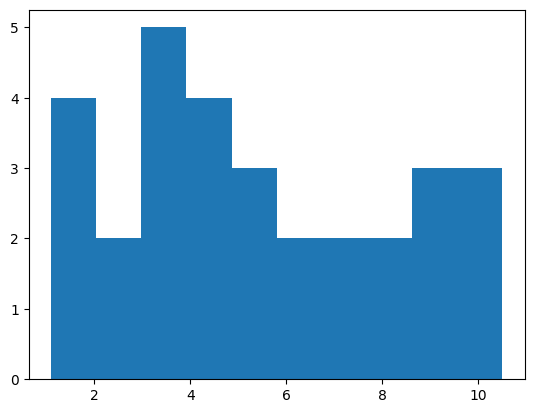

In [ ]:
# VERIFy IF GAUSSIAN  :Histogramme
plt.hist(data_x['YearsExperience'])


In [ ]:
#Explore the mean max and min values
data_x.describe()

,YearsExperience
count,30.000000
mean,5.313333
std,2.837888
min,1.100000
25%,3.200000
50%,4.700000
75%,7.700000
max,10.500000


{'whiskers': [<matplotlib.lines.Line2D at 0x77fde5d457e0>,
 'caps': [<matplotlib.lines.Line2D at 0x77fde5d45c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fde5d45570>],
 'medians': [<matplotlib.lines.Line2D at 0x77fde5d463e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fde5d46590>],
 'means': []}

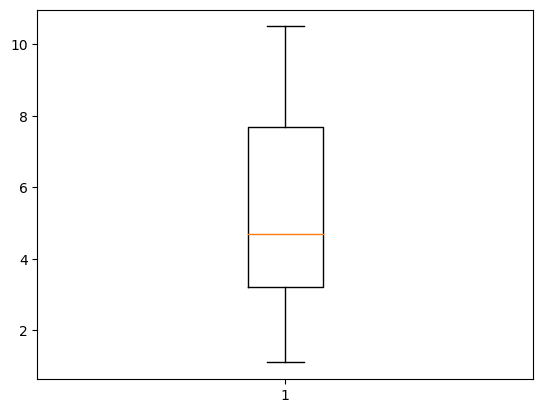

In [ ]:
#detect outlier
plt.boxplot(data_x['YearsExperience'])

In [ ]:
#Other Technique :static test :shaprio  pvalue is >0.5
shapiro(data_x['YearsExperience'])


ShapiroResult(statistic=0.9420625567436218, pvalue=0.1033766120672226)

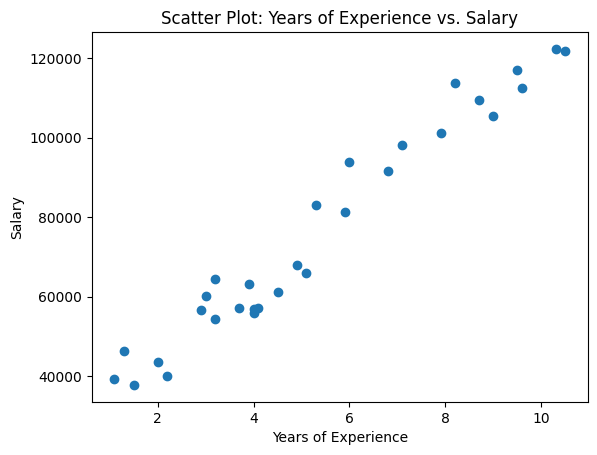

In [ ]:
#sohw the result
plt.scatter(data_x['YearsExperience'], data_y['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot: Years of Experience vs. Salary')
plt.show()

In [ ]:
# Split the data for test  and train
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=1/3)
#random state to get the same split every time.
x_train
x_test
y_train
y_test

,Salary
23,113812.0
21,98273.0
22,101302.0
2,37731.0
10,63218.0
16,66029.0
11,55794.0
17,83088.0
1,46205.0
27,112635.0


In [ ]:
#linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(y_pred)


[[102507.83555309]
 [ 92200.67175535]
 [ 99696.79088098]
 [ 39727.83787592]
 [ 62216.19525282]
 [ 73460.37394127]
 [ 63153.21014352]
 [ 75334.40372268]
 [ 37853.80809451]
 [115626.04402295]]


In [ ]:
MAE= metrics.mean_absolute_error(y_pred,y_test)
MSE= metrics.mean_squared_error(y_pred,y_test)
RMSE=metrics.mean_squared_error(y_pred,y_test)**0.5
print(MAE)
print(MSE)
print(RMSE)

5586.676072422972
42041527.31361604
6483.94380864116


In [ ]:

rmse=[]
for i in range(100) :
# Split the data into training and testing
  x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=i)
  regressor.fit(x_train,y_train)
  y_pred=regressor.predict(x_test)
  RMSE=metrics.mean_squared_error(y_pred,y_test)**0.5
  rmse.append(RMSE)
print(argmin(rmse))

39


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=39)
regressor.fit(x_train,y_train)
y_pred= regressor.predict(x_test)
RMSE=metrics.mean_squared_error(y_pred,y_test)**0.5
print(RMSE)

1937.2400198971254
